In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("ratings_Beauty.csv")

In [4]:
df

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [5]:
df.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [6]:
df.head(5)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [7]:
df.shape

(2023070, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


# Now let's clean our valuable data

In [9]:
df.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [11]:
df.duplicated().sum()

0

# What is the number of users ,products ,and the total ratings ?

In [15]:
print("total User:",len(df.UserId.unique()))

total User: 1210271


In [16]:
print("total Product:",len(df.ProductId.unique()))

total Product: 249274


# What is the number of ratings per product ?

In [17]:
rating_product=df.groupby("ProductId")['Rating'].count()

In [21]:
rating_product.sort_values(ascending=False)

ProductId
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
              ... 
B004U81OBC       1
B004U7R0EI       1
B004U7Q2O2       1
B004U7NKRE       1
B00LU0LTOU       1
Name: Rating, Length: 249274, dtype: int64

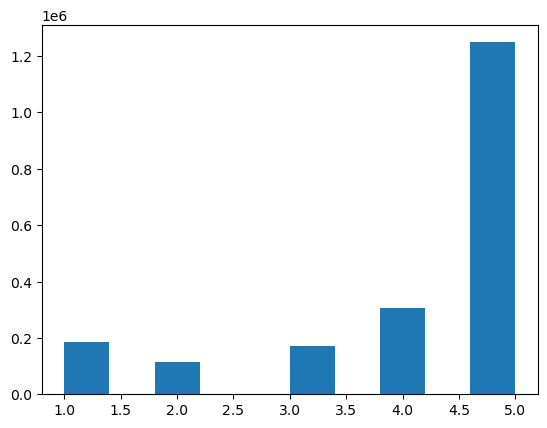

In [22]:
plt.hist(df["Rating"])
plt.show()

# What is the percentage of the products with 5 rate ?

In [24]:
print(len(df[df.Rating==5]['ProductId'].unique())/len(df['ProductId'].unique()))

0.8056636472315605


Let's describe the users : 

In [61]:
highest_rating_product = df.groupby("ProductId")['Rating'].mean().sort_values(ascending=False).head(1)
print("Product with the highest average rating:")
print(highest_rating_product)


Product with the highest average rating:
ProductId
0205616461    5.0
Name: Rating, dtype: float64


In [64]:
# Filter the DataFrame for ratings of product '0205616461' and rating 5
users_with_5_stars = df[(df['ProductId'] == '0205616461') & (df['Rating'] == 5)]['UserId'].unique()

# Filter the DataFrame for ratings of product '0205616461' and rating 1
users_with_1_star = df[(df['ProductId'] == '0205616461') & (df['Rating'] == 1)]['UserId'].unique()

# Calculate the number of unique users for each rating
num_users_with_5_stars = len(users_with_5_stars)
num_users_with_1_star = len(users_with_1_star)

print("Number of users with 5-star rating for product '0205616461':", num_users_with_5_stars)
print("Number of users with 1-star rating for product '0205616461':", num_users_with_1_star)


Number of users with 5-star rating for product '0205616461': 1
Number of users with 1-star rating for product '0205616461': 0


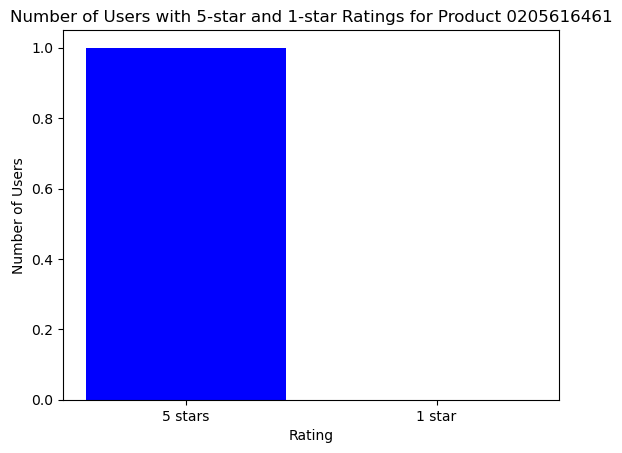

In [66]:
plt.bar(['5 stars', '1 star'], [num_users_with_5_stars, num_users_with_1_star], color=['blue', 'red'])
plt.title('Number of Users with 5-star and 1-star Ratings for Product 0205616461')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()